# M.bovis deletions

Find deletions in a set of M.bovis isolates aligned to Mtb genome.

In [1]:
import sys,os,io,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
import seaborn as sns
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting, rdiff
import toytree, toyplot

In [ ]:
reload(app)
args = {'threads':12,'outdir': '/storage/btbgenie/deletions_analysis', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/Wicklow/',
                 '/storage/btbgenie/mbovis_ireland/CVRL/'],
         'species': 'MTB-H37Rv', 
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [30]:
meta=pd.read_csv('/storage/btbgenie/all_ireland_results/metadata.csv')

In [35]:
samples=pd.read_csv('/storage/btbgenie/deletions_analysis/samples.csv')
#samples=samples.merge(meta,on='sample',how='left')

In [7]:
#spo = tools.get_spoligotypes(samples)
#spo.to_csv('spoligotypes.csv')

In [26]:
rd = pd.read_csv('/home/farrell/gitprojects/snipgenie/snipgenie/data/RD.csv')

## get deletions for all samples

In [ ]:
reload(rdiff)
s = samples
x = rdiff.get_deletions(s, app.mtb_genome, app.mtb_gb, n_cores=12)
x.to_csv('deletion_regions.csv',index=False)

In [121]:
x

,start,end,length,name,group,genes
115,1696016,1708749,12733,1034,1696016,Rv1507c-Rv1516c
68,1696017,1708749,12732,13-11594,1696016,Rv1507c-Rv1516c
48,1696017,1708749,12732,14-MBovis,1696016,Rv1507c-Rv1516c
71,1696017,1708747,12730,15-11643,1696016,Rv1507c-Rv1516c
63,1696017,1708749,12732,17-11662,1696016,Rv1507c-Rv1516c
...,...,...,...,...,...,...
139,2630074,2630138,64,TB20-009217,2630268,plcB
128,2630268,2630673,405,TB21-000449,2630268,
123,2630074,2630138,64,TB21-000449,2630268,plcB
126,2630247,2630253,6,TB21-000449,2630268,plcB


In [122]:
x = pd.read_csv('deletion_regions.csv')
x = x.merge(meta,left_on='name',right_on='sample',how='left')
regions = rdiff.filter_regions(x, 'mask.bed')

66368
19521


In [ ]:
#col_colors,colormap = plotting.get_color_mapping(regions,'county1',cmap='Paired',seed=18)

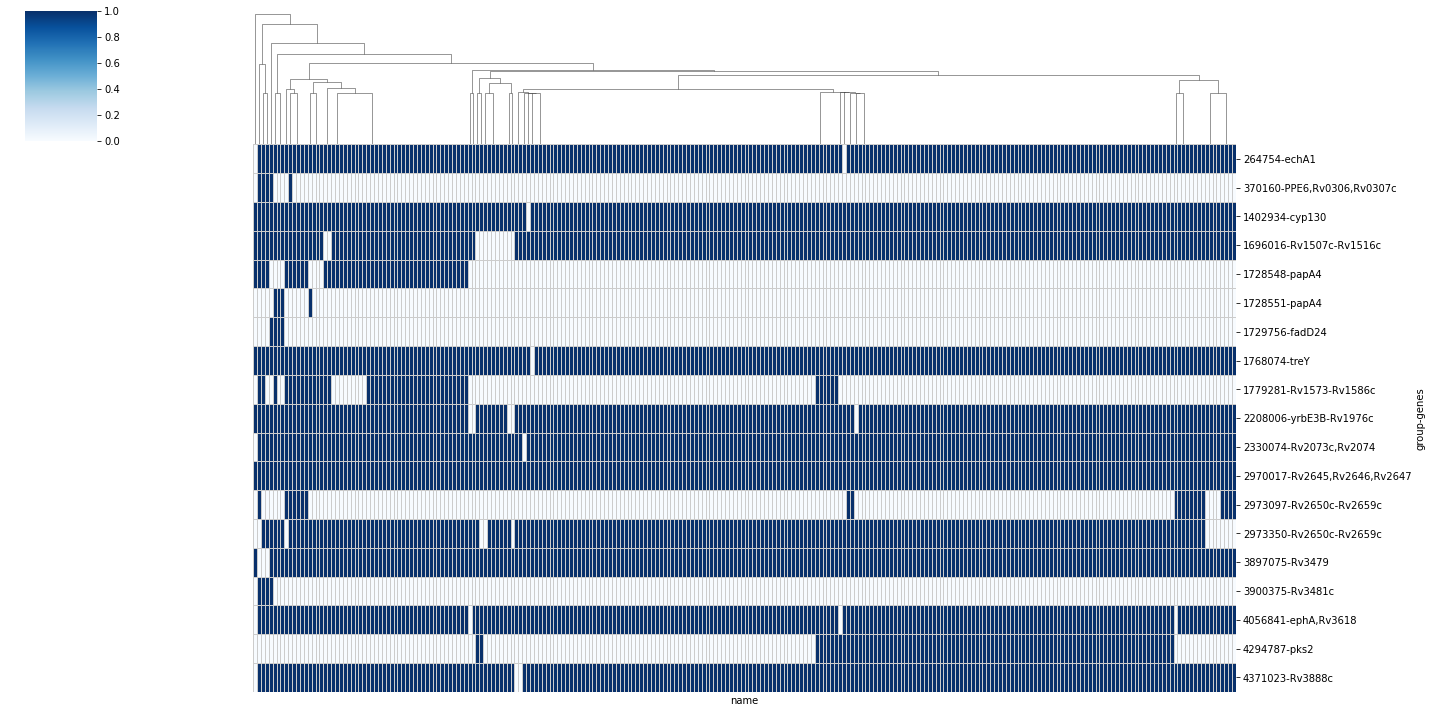

In [129]:
res=regions[regions.length>500]
X=pd.pivot_table(res,index=['group','genes'],columns='name',values='length').fillna(0)
X=X.clip(0,1)
X=X[X.sum(1)>3]
sns.clustermap(X,cmap='Blues',row_cluster=False,xticklabels=False,yticklabels=True,
               lw=1,linecolor='.8',figsize=(20,10))

In [ ]:
reload(rdiff)
s=1778000;e=s+12000
s=2970000;e=s+12000
rdiff.show_coverage(samples[35:75],'NC_000962.3',s,e,app.mtb_genome,app.mtb_gb, minq=0,
                      labelcol='county',margin=100)

In [ ]:
reload(rdiff)
groups = X[X.sum(1)>40].index.get_level_values(0)

for i,g in list(res.groupby('group')):
    r=g.iloc[0]
    if r.group in groups:
        print (r.start,r.end,r.length)
        rdiff.show_coverage(samples.sample(20),'NC_000962.3',r.start,r.end,app.mtb_genome,app.mtb_gb,minq=0,
                           colors={'cat-003488':'red'},margin=200)